## 1. VaR (Value at Risk)
La VaR mesure le risque de perte sur un portefeuille d'actifs financiers. Pour un niveau de confiance donné, elle indique le montant maximal de perte possible sur une période donnée.

Exemple en Python (calcul de la VaR d'un portefeuille simple) :

In [1]:
import numpy as np
import scipy.stats as stats

# Supposons que le rendement du portefeuille suit une distribution normale
rendement_moyen = 0.01  # Moyenne des rendements
ecart_type = 0.05  # Écart-type des rendements
niveau_confiance = 0.95  # Niveau de confiance

# Calcul de la VaR
var = stats.norm.ppf(1 - niveau_confiance, rendement_moyen, ecart_type)
print(f"VaR à {niveau_confiance*100}% de niveau de confiance : {var}")


VaR à 95.0% de niveau de confiance : -0.07224268134757363


In [3]:
import numpy as np
from scipy.stats import norm

# Données historiques des rendements d'un actif
returns = np.array([0.02, -0.01, 0.03, -0.02, 0.01])

# Niveau de confiance (par exemple, 95%)
confidence_level = 0.95

# Calcul de la VaR
VaR = np.percentile(returns, 100 * (1 - confidence_level))
print(f"La VaR à {confidence_level*100}% est de {VaR:.4f}")


La VaR à 95.0% est de -0.0180


## 2. IRC (Incremental Risk Charge)
L’IRC mesure l’impact d’un nouvel instrument financier sur le risque global d’un portefeuille.

L'IRC est une mesure du risque de crédit sur un horizon de temps donné, prenant en compte les changements potentiels de la note de crédit et le risque de défaut.

Exemple en Python (calcul simplifié) :

Pour calculer l'IRC, on aurait besoin de modèles complexes qui intègrent des transitions de notation de crédit, des probabilités de défaut, etc. Ce calcul dépasse le cadre d'un exemple simple.

In [4]:
# Supposons que nous ajoutions un nouvel instrument avec une perte de 1000 $
new_instrument_loss = 1000

# Calcul de l'IRC
IRC = new_instrument_loss - VaR
print(f"L'IRC est de {IRC:.2f}")


L'IRC est de 1000.02


## 3. EEPE (Effective Expected Positive Exposure)
L’EEPE mesure l’exposition attendue d’un portefeuille à un risque de crédit.

L'EEPE est une mesure utilisée pour évaluer l'exposition au risque de contrepartie sur les dérivés. Elle calcule l'exposition positive moyenne attendue sur une période donnée.

Exemple en Python (calcul simplifié) :

In [5]:
# Supposons des expositions simulées pour un dérivé
expositions = np.array([100, 200, 150, 250, 300])

# Calcul de l'EEPE
eepe = np.mean(expositions)
print(f"EEPE : {eepe}")


EEPE : 200.0


In [6]:
# Supposons que nous ayons des expositions de crédit
exposures = np.array([5000, 3000, 2000, 4000])

# Calcul de l'EEPE
EEPE = np.mean(exposures)
print(f"L'EEPE est de {EEPE:.2f}")


L'EEPE est de 3500.00


## 4. WWR (Wrong Way Risk)
Le WWR se produit lorsque le risque de crédit d’un contrepartiste est corrélé positivement avec la valeur de marché de ses actifs.

Le WWR est le risque que l'exposition à une contrepartie augmente au moment où la qualité de crédit de cette contrepartie se détériore.

Exemple en Python (illustration conceptuelle) :

Calculer le WWR nécessite une analyse des corrélations entre l'exposition et la qualité de crédit de la contrepartie. Ce calcul est spécifique à chaque situation et nécessite des données détaillées sur la contrepartie et le marché.

Le Wrong Way Risk (WWR). Le WWR se produit lorsque le risque de crédit d’un contrepartiste est corrélé positivement avec la valeur de marché de ses actifs. Pour détecter cela, nous devons analyser la corrélation entre les rendements de l’actif et le risque de crédit.

Corrélation entre les rendements de l'actif et le risque de crédit : -0.4489
Pas de WWR (corrélation négative ou nulle).


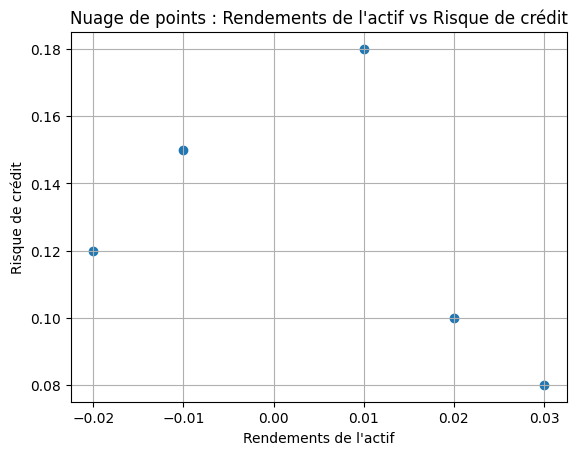

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Exemple de données fictives
# Rendements de l'actif
asset_returns = np.array([0.02, -0.01, 0.03, -0.02, 0.01])

# Risque de crédit (par exemple, probabilité de défaut)
credit_risk = np.array([0.1, 0.15, 0.08, 0.12, 0.18])

# Calcul de la corrélation
correlation = np.corrcoef(asset_returns, credit_risk)[0, 1]

# Affichage des résultats
print(f"Corrélation entre les rendements de l'actif et le risque de crédit : {correlation:.4f}")

# Interprétation
if correlation > 0:
    print("Le WWR est présent (corrélation positive).")
else:
    print("Pas de WWR (corrélation négative ou nulle).")

# Tracé du nuage de points
plt.scatter(asset_returns, credit_risk)
plt.xlabel("Rendements de l'actif")
plt.ylabel("Risque de crédit")
plt.title("Nuage de points : Rendements de l'actif vs Risque de crédit")
plt.grid(True)
plt.show()


## 5. Sensibilités (Greeks) :
Les sensibilités mesurent la réaction d’un portefeuille d’options aux variations des paramètres du marché (comme la volatilité, les taux d’intérêt, etc.).

Les sensibilités, également connues sous le nom de Grecs, sont des mesures qui évaluent la réaction d’un portefeuille d’options aux variations des paramètres du marché. Ces paramètres incluent la volatilité, les taux d’intérêt, le temps restant jusqu’à l’expiration et le prix de l’actif sous-jacent. Voici un exemple de code Python pour calculer certaines des sensibilités les plus courantes :

In [8]:
import numpy as np
from scipy.stats import norm

# Paramètres de l'option
S0 = 100  # Prix actuel de l'actif sous-jacent
K = 105   # Prix d'exercice de l'option
r = 0.05  # Taux d'intérêt sans risque
T = 0.5   # Durée jusqu'à l'expiration (en années)
sigma = 0.2  # Volatilité de l'actif sous-jacent

# Calcul du delta (sensibilité au prix de l'actif sous-jacent)
d1 = (np.log(S0 / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
delta = norm.cdf(d1)
print(f"Delta : {delta:.4f}")

# Calcul du gamma (sensibilité du delta au prix de l'actif sous-jacent)
d2 = d1 - sigma * np.sqrt(T)
gamma = norm.pdf(d1) / (S0 * sigma * np.sqrt(T))
print(f"Gamma : {gamma:.4f}")

# Calcul de la vega (sensibilité à la volatilité)
vega = S0 * norm.pdf(d1) * np.sqrt(T)
print(f"Vega : {vega:.4f}")

# Calcul de la theta (sensibilité au temps)
theta = -(S0 * norm.pdf(d1) * sigma) / (2 * np.sqrt(T)) - r * K * np.exp(-r * T) * norm.cdf(d2)
print(f"Theta : {theta:.4f}")


Delta : 0.4612
Gamma : 0.0281
Vega : 28.0757
Theta : -7.6919


## Conclusion
Ces concepts sont essentiels pour la gestion du risque dans le secteur financier. Les exemples fournis sont simplifiés pour illustrer le calcul de base. Dans la pratique, le calcul de ces mesures de risque est beaucoup plus complexe et nécessite des données détaillées, ainsi que des modèles statistiques et financiers avancés.